In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean

# plt.rcParams["figure.figsize"] = (3,3)
print (time.ctime())

Mon Dec 14 11:37:54 2020


In [2]:
# file1 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_visEq_1s_W0028_F03-200228-095644-1.csv"
file1 ="/QuantumRouter/AOD12112020/AOD_10s_TDCtest_W0028_H07-201211-153448-1.csv"
print (file1, time.ctime())

# data1=np.loadtxt(file1, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data1 = np.genfromtxt(file1, delimiter=",", skip_header=True)[:, 1:]
data1 = pd.read_csv(file1)
print(pd.read_csv(file1, nrows=5))
print(time.ctime())
# #print data
# y1   = data1.iloc[:, 0]
# x1   = data1.iloc[:, 1]
# t1   = data1.iloc[:, 2]
# a1   = data1.iloc[:, 3]
# A1   = data1.iloc[:, 4]

# for i in range(0,20):
#     print (i, x1[i],y1[i],t1[i],a1[i],A1[i])
    
# print (len(t1), time.ctime())

# file2 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_SettingsEq_1s_W0028_F03-200228-100050-1.csv"
file2 = "/QuantumRouter/AOD12112020/AOD_10s_TDCtest_W0028_H07-201211-153448-1_time.csv"
print (file2, time.ctime())

# data2=np.loadtxt(file2, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data2 = np.genfromtxt(file2, delimiter=",", skip_header=True)[:, 1:]
data2 =pd.read_csv(file2)
print(pd.read_csv(file2, nrows=5))
print(time.ctime())
# # #print data
# # y2  = data2.iloc[:, 0]
# # x2  = data2.iloc[:, 1]
# # t2  = data2.iloc[:, 2]
# # a2  = data2.iloc[:, 3]
# # A2  = data2.iloc[:, 4]

# # for i in range(0,20):
# #     print (i, x2[i],y2[i],t2[i],a2[i],A2[i])
    
# # print (len(t2), time.ctime())

/QuantumRouter/AOD12112020/AOD_10s_TDCtest_W0028_H07-201211-153448-1.csv Mon Dec 14 11:37:54 2020
   #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  \
0      949  159745766869   134    34  159747229952       1250            1250   
1      949  159745766869   136    34  159747229952        850             850   
2      949  159745766869   134    32  159747229952       9350            9350   
3      949  159745766869   134    33  159747229952       6800            6800   
4      949  159745766869   133    32  159747229952        600             600   

   #Trig-ToA[arb]  Unnamed: 8  
0         1463083         NaN  
1         1463083         NaN  
2         1463083         NaN  
3         1463083         NaN  
4         1463083         NaN  
Mon Dec 14 11:38:04 2020
/QuantumRouter/AOD12112020/AOD_10s_TDCtest_W0028_H07-201211-153448-1_time.csv Mon Dec 14 11:38:04 2020
   #TrigId  #TrigTime  #TrigTimeNext  #Events Unnamed: 4
0        1  139145685      303350656  

In [3]:
data1.shape, data2.shape

((19838964, 9), (11930, 5))

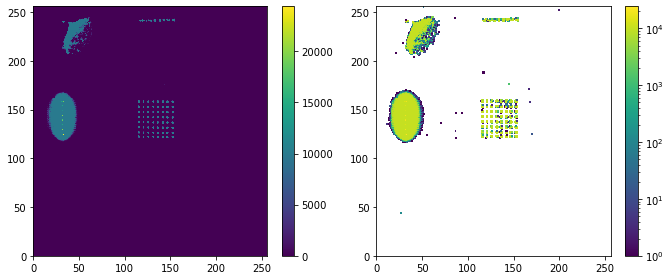

In [4]:
#File 1 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

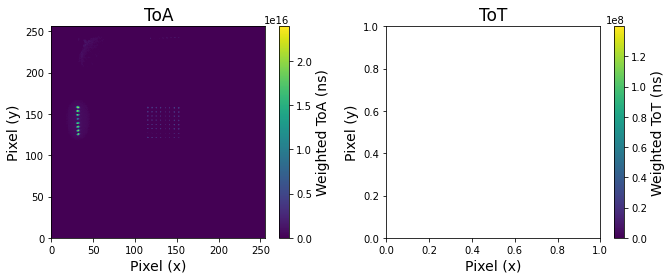

In [5]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
# data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)]
h = ax0.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToA'], 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax0.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToT[arb]'], 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()

In [6]:
# file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1_cent.csv"
GridX1min = 115
GridX1max = 160
GridY1min = 105
GridY1max = 150

# file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1.csv"
GridX2min = 118
GridX2max = 161
GridY2min = 108
GridY2max = 151

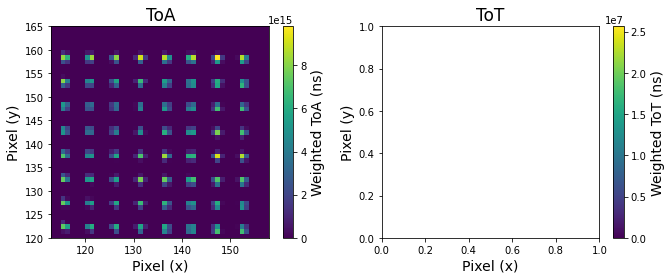

In [145]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
# data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)]
h = ax0.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToA'], 
               bins = GridX1max-GridX1min, range = [(GridX1min-2, GridX1max-2), (GridY1min+15, GridY1max+15)],
               )
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax0.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToT[arb]'], 
               bins = GridX1max-GridX1min, range = [(GridX1min-2, GridX1max-2), (GridY1min+15, GridY1max+15)],
               )
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()

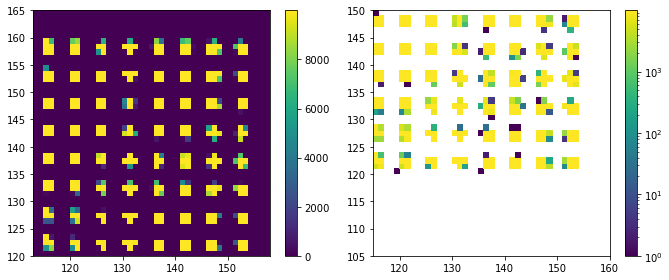

In [142]:
#File 1 grid

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min-2, GridX1max-2), (GridY1min+15, GridY1max+15)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()
# fig.savefig('fullgrid_8212020_025044-1_cent.png')

In [8]:
256-180

76

Text(0.5, 1.0, 'Grid')

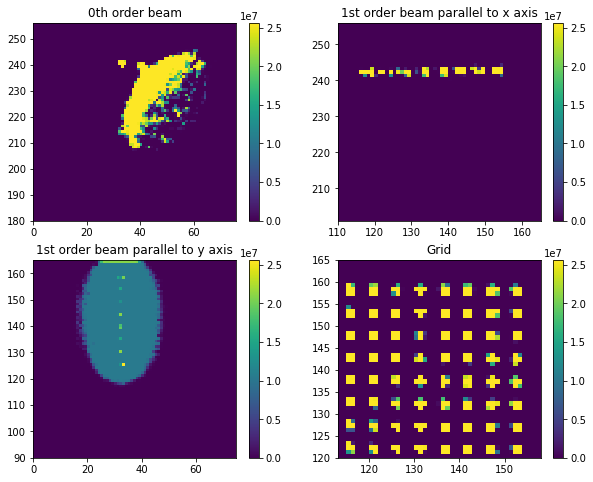

In [146]:
#Display 1th order bottom spot

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))

h1 = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 76, range = [(0, 76), (180, 256)])
fig.colorbar(h[3], ax = ax1)
ax1.set_title('0th order beam')

h2 = ax2.hist2d(data1['#Row'], data1['#Col'], bins = 55, range = [(110, 165), (201,256)])
fig.colorbar(h[3], ax = ax2)
ax2.set_title('1st order beam parallel to x axis')

h3 = ax3.hist2d(data1['#Row'], data1['#Col'], bins = 75, range = [(0, 75), (90, 165)])
fig.colorbar(h[3], ax = ax3)
ax3.set_title('1st order beam parallel to y axis')

h4 = ax4.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min-2, GridX1max-2), (GridY1min+15, GridY1max+15)])
fig.colorbar(h[3], ax = ax4)
ax4.set_title('Grid')


In [10]:
def min_max(data, grid_x_min, grid_x_max, grid_y_min, grid_y_max):
    """Returns DataFrame filtering values less than min or greater than max for two columns"""
    x_cond = (data['#Row'] <grid_x_min) | (data['#Row'] > grid_x_max)
    y_cond = (data['#Col'] < grid_y_min) | (data['#Col'] > grid_y_max)
    new_data = data.drop(data[x_cond | y_cond].index)
    return new_data

grid1_df = min_max(data1, GridX1min, GridX1max, GridY1min, GridY1max)

print(grid1_df.shape, type(grid1_df.iloc[0,0]), type(grid1_df.iloc[1,1]), time.ctime())
print(grid1_df.iloc[:3])

# grid2_df = min_max(data2, GridX2min, GridX2max, GridY2min, GridY2max)

# print(grid2_df.shape, type(grid2_df.iloc[0,0]), type(grid2_df.iloc[1,1]), time.ctime())
# print(grid2_df.iloc[:3])

(2022613, 9) <class 'numpy.int64'> <class 'numpy.int64'> Mon Dec 14 11:38:29 2020
     #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  \
258      949  159745766869   132   136  159747234048       2000   
285      949  159745766869   132   153  159747234304        750   
292      949  159745766869   133   115  159747234304        775   

     #ToTtotal[arb]  #Trig-ToA[arb]  Unnamed: 8  
258            2000         1467179         NaN  
285             750         1467435         NaN  
292             775         1467435         NaN  


In [11]:
oth_df = min_max(data1, 0, 76, 180, 256)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(oth_df.shape, type(oth_df.iloc[0,0]), type(oth_df.iloc[1,1]), time.ctime())
print(oth_df.iloc[:3])

(4785923, 9) <class 'numpy.int64'> <class 'numpy.int64'> Mon Dec 14 11:38:33 2020
     #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  \
164      949  159745766869   235    42  159747233280        475   
165      949  159745766869   236    42  159747233280        500   
167      949  159745766869   236    46  159747233280        375   

     #ToTtotal[arb]  #Trig-ToA[arb]  Unnamed: 8  
164             475         1466411         NaN  
165             500         1466411         NaN  
167             375         1466411         NaN  


In [12]:
X_df = min_max(data1, 110, 165, 201, 256)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(X_df.shape, type(X_df.iloc[0,0]), type(X_df.iloc[1,1]), time.ctime())
print(X_df.iloc[:3])

(459775, 9) <class 'numpy.int64'> <class 'numpy.int64'> Mon Dec 14 11:38:37 2020
      #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  \
979       949  159745766869   243   154  159747238656       1500   
983       949  159745766869   242   154  159747238656       1350   
1044      949  159745766869   242   119  159747238912       1200   

      #ToTtotal[arb]  #Trig-ToA[arb]  Unnamed: 8  
979             1500         1471787         NaN  
983             1350         1471787         NaN  
1044            1200         1472043         NaN  


In [13]:
Y_df = min_max(data1, 0, 75, 90, 165)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Y_df.shape, type(Y_df.iloc[0,0]), type(Y_df.iloc[1,1]), time.ctime())
print(Y_df.iloc[:3])

(11587479, 9) <class 'numpy.int64'> <class 'numpy.int64'> Mon Dec 14 11:38:40 2020
   #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  \
0      949  159745766869   134    34  159747229952       1250            1250   
1      949  159745766869   136    34  159747229952        850             850   
2      949  159745766869   134    32  159747229952       9350            9350   

   #Trig-ToA[arb]  Unnamed: 8  
0         1463083         NaN  
1         1463083         NaN  
2         1463083         NaN  


In [14]:
TrigTime = data2['#TrigTime'].to_numpy()

In [112]:
(TrigTime[1]/4096.*25.-TrigTime[0]/4096.*25.)*10**(-3)

1002.2276062011719

In [42]:
TrigTime[0], TrigTime[1]

(139145685, 303350656)

'Mon Dec 14 13:47:03 2020'

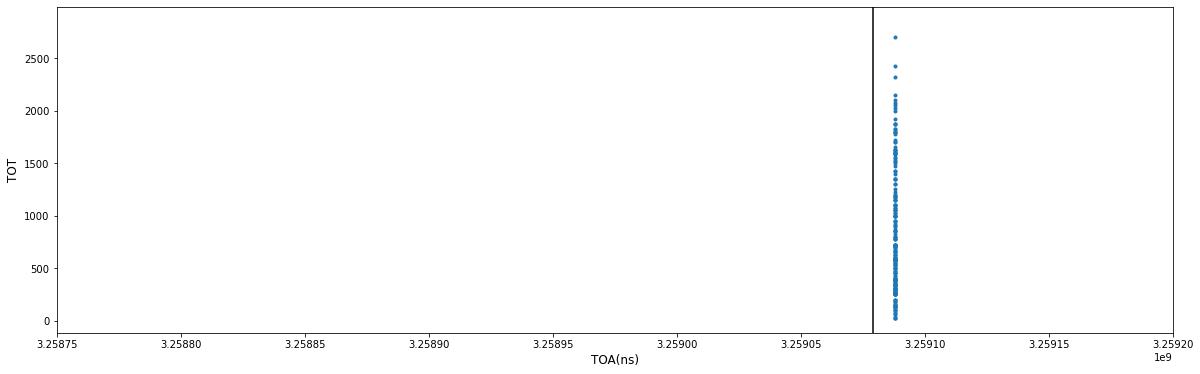

In [115]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(grid1_df['#ToA']/4096.*25.,grid1_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(10000):
    plt.axvline(x=(TrigTime[i]/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
plt.xlim(3.25875e9, 3.2592e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [63]:
ToAmin = (3.25875e9)*4096./25.
ToAmax = (3.2592e9)*4096./25.
globals()["grid1_pulse_3.25875e9_3.25920e9_df"] = \
grid1_df.drop(grid1_df[(grid1_df['#ToA'] < ToAmin) | (grid1_df['#ToA'] > ToAmax)].index)

In [64]:
globals()["grid1_pulse_3.25875e9_3.2592e9_df"].shape

(205, 9)

In [119]:
for i in range(len(TrigTime)):
    if (ToAmin < TrigTime[i] < ToAmax):
        print(TrigTime[i]/4096.*25, " ")

3259079038.800049  


In [152]:
print((globals()["grid1_pulse_3.25875e9_3.2592e9_df"]['#ToA'].min()/4096.*25.)-(3259079038.800049), 'ns')

8959.637451171875 ns


In [121]:
periodlist = []

for i in range(len(TrigTime)):
    periodlist.append(TrigTime[i+1]-TrigTime[i])
    print(TrigTime[i+1]-TrigTime[i])

164204971
164203093
164203563
164205354
164203179
164204971
164204032
164204117
164204032
164202581
164205483
164203947
164202837
164204843
164203221
164203904
164204971
164204160
164203989
164203947
164204117
164204032
164203819
164204288
164203093
164204971
164204117
164204032
164203563
164204501
164204032
164204032
164203776
164204928
164203093
164204928
164203179
164205056
164203947
164203093
164204971
164203093
164203605
164204118
164204032
164203946
164205483
164203563
164203136
164204032
164203989
164204971
164204032
164203776
164204373
164203947
164203776
164204373
164203691
164204416
164204032
164204117
164203691
164204117
164203904
164204971
164203178
164204928
164204118
164204032
164203989
164203136
164203563
164204160
164205397
164204032
164203947
164204117
164202752
164203947
164204032
164204928
164204117
164203691
164204288
164204032
164203136
164204928
164204160
164203093
164204971
164203648
164204501
164204032
164203563
164204501
164204032
164204032
164203776
164204843


164204032
164204117
164204587
164203477
164203563
164205056
164203136
164205056
164203989
164203947
164204032
164204032
164204032
164203221
164203947
164204928
164204032
164204160
164202624
164205525
164203563
164204032
164204032
164203178
164204928
164203990
164204032
164203136
164204928
164203136
164204117
164204032
164204971
164203093
164205056
164203947
164204117
164203563
164205056
164203477
164203605
164205142
164203008
164204117
164204928
164203947
164204245
164202539
164205440
164203093
164204928
164204032
164203136
164204032
164204971
164204032
164204117
164202539
164205525
164204032
164203563
164204032
164204117
164204075
164204672
164203008
164204501
164203563
164204501
164203008
164205056
164203947
164203093
164204715
164203904
164204501
164204587
164204245
164203904
164203947
164204032
164204160
164202624
164205440
164204117
164202539
164205440
164204032
164204032
164204117
164203563
164204032
164204501
164204032
164203605
164203094
164204928
164204032
164203221
164203947


164204032
164204032
164203648
164204416
164203563
164204032
164204160
164204117
164204032
164204032
164204032
164204032
164204032
164204032
164204032
164204587
164204032
164203477
164204032
164204587
164204160
164203989
164204075
164204032
164204032
164204117
164204032
164204032
164204032
164203563
164204416
164204117
164204032
164203563
164204032
164204032
164204032
164204032
164204160
164203946
164204075
164204075
164204032
164204117
164204032
164203947
164204032
164204672
164203392
164204117
164204032
164204032
164204032
164204587
164203477
164204587
164204032
164204032
164204160
164204032
164203904
164204160
164204032
164204032
164204032
164203690
164204459
164203563
164204501
164203563
164204032
164204501
164203563
164204032
164204117
164203947
164204032
164204032
164204117
164204160
164203947
164204117
164204032
164204032
164204032
164203947
164204117
164204032
164204587
164204117
164203947
164204032
164204160
164204032
164203904
164204032
164288384
164205312
164204117
164202667


164204032
164204032
164203648
164203136
164204032
164204117
164205312
164202752
164203947
164204928
164204032
164204032
164203221
164204971
164204032
164204117
164204032
164203008
164205056
164204032
164204032
164203691
164203946
164204203
164204288
164204587
164203477
164203691
164204117
164204885
164203990
164203221
164204928
164203136
164205056
164203947
164204117
164203947
164204032
164202709
164205440
164202624
164205440
164202667
164205056
164203093
164204843
164204160
164204117
164204032
164204032
164204587
164203477
164204587
164203008
164205056
164203093
164204032
164204075
164204970
164203094
164204928
164203221
164205056
164202539
164205440
164202624
164204032
164205440
164203690
164203990
164203008
164204032
164204117
164205013
164203990
164203093
164204032
164204971
164203221
164204032
164204032
164204928
164203691
164205056
164203136
164204373
164204587
164203136
164205056
164203349
164203691
164204373
164203691
164205056
164203904
164204032
164204160
164203093
164205013


164204032
164204587
164204032
164203477
164204032
164204032
164204587
164204160
164203946
164204118
164204032
164204032
164204032
164204117
164204032
164203947
164204032
164204032
164204117
164204032
164203563
164204032
164204074
164204032
164204032
164204118
164204032
164204032
164204032
164204117
164203947
164204117
164203947
164204117
164204032
164204032
164203947
164204672
164204032
164204032
164203477
164204032
164204587
164204245
164203947
164203904
164204032
164204117
164204160
164203947
164204032
164203989
164204075
164204117
164204032
164203947
164204117
164204032
164203563
164204501
164203691
164203904
164204032
164204160
164203904
164204117
164204032
164204075
164204032
164204117
164203947
164203989
164204075
164204032
164204757
164203947
164204117
164203947
164204032
164204160
164203904
164204074
164203990
164204074
164204203
164203947
164289152
164204032
164204032
164204117
164203136
164204843
164203136
164204117
164205056
164203008
164204971
164204032
164204117
164204032


164203904
164203221
164204885
164204075
164204075
164203093
164205056
164203691
164204928
164203136
164204928
164204032
164204032
164203178
164204886
164204032
164204032
164202752
164205440
164203093
164204971
164202837
164203819
164205440
164204032
164204032
164204117
164204032
164204032
164202539
164205056
164204032
164203093
164205440
164203563
164204160
164203008
164204970
164204075
164203691
164204032
164204501
164203691
164204373
164204587
164203136
164204373
164203563
164204501
164204587
164203136
164204032
164204117
164203947
164205056
164203093
164204032
164203563
164204032
164204032
164204032
164204032
164205525
164203605
164203051
164205440
164203563
164203221
164205056
164203563
164203392
164204032
164204928
164204245
164203947
164204117
164204032
164203563
164204160
164204032
164204928
164203136
164204373
164204587
164203136
164204928
164204032
164203136
164205056
164203093
164204971
164203946
164204118
164204117
164203563
164204032
164204032
164204032
164204501
164203563


164204032
164204032
164204245
164203947
164204032
164204032
164204117
164204032
164203563
164204501
164204032
164204032
164204032
164204032
164204032
164203605
164204118
164204032
164204117
164203947
164203989
164204075
164204117
164204032
164204032
164204032
164204032
164204032
164204032
164204032
164204032
164204032
164204629
164204118
164204032
164203946
164203990
164204074
164204118
164204032
164204117
164204032
164204032
164203947
164204117
164203563
164204501
164204032
164204032
164204032
164203563
164204245
164203819
164204245
164204032
164203947
164204032
164204672
164203392
164204032
164204032
164204117
164204032
164204629
164204118
164203904
164204160
164203989
164204075
164204117
164204032
164203947
164204032
164204032
164204032
164204032
164204032
164204117
164203563
164204032
164204501
164204032
164204032
164203563
164204501
164203563
164204160
164204032
164204117
164204032
164204032
164204032
164204032
164204587
164203477
164204032
164204032
164204032
164204032
164204587


164203776
164204416
164204032
164203648
164203392
164205056
164203648
164204160
164204928
164203008
164204416
164203648
164204501
164204032
164204587
164204032
164203178
164204886
164202752
164204501
164204885
164204118
164203093
164204971
164204117
164203947
164203093
164205056
164202539
164204160
164204928
164204032
164203136
164204928
164204032
164204501
164203563
164204160
164203989
164203989
164204032
164204118
164203093
164204032
164205696
164203392
164204587
164203477
164204587
164204032
164203136
164204928
164203221
164204843
164203136
164204032
164205098
164203990
164202624
164205056
164203050
164205014
164203136
164204928
164203008
164205525
164202539
164205056
164204501
164202624
164204971
164204032
164203136
164204032
164204672
164203477
164204032
164204032
164204032
164263211
164205440
164204117
164204032
164203563
164204117
164204075
164203989
164203989
164204118
164203946
164204203
164204032
164203947
164204117
164204587
164204032
164203477
164204032
164204587
164204032


164205056
164204032
164203947
164204117
164203947
164204117
164204032
164203648
164204971
164204160
164203904
164204074
164202710
164205525
164203947
164204032
164204032
164203648
164204416
164202624
164205525
164203563
164204032
164203136
164205013
164203051
164204928
164203221
164204843
164204074
164203179
164204843
164204160
164204032
164204032
164204032
164204117
164203691
164203904
164204117
164204416
164204587
164204032
164204032
164204032
164204117
164203051
164204032
164204970
164204203
164203947
164204032
164202666
164205483
164204032
164202624
164203947
164204032
164204117
164205099
164203093
164204843
164204032
164204032
164203776
164204288
164204160
164204032
164203093
164204971
164203648
164204501
164203563
164204501
164203691
164204373
164204032
164204032
164204587
164203477
164204757
164203862
164204160
164202624
164205525
164204032
164202581
164205483
164203691
164204373
164202539
164205525
164203563
164204501
164202624
164204075
164204117
164204971
164203946
164203990


164204032
164204160
164204117
164203947
164204032
164204117
164203947
164204032
164204117
164203563
164204501
164204032
164204032
164204032
164204032
164203563
164204032
164204117
164204032
164204032
164204075
164204032
164204032
164204032
164204117
164204587
164203477
164204587
164204032
164203477
164204587
164204074
164204118
164203946
164204118
164204117
164204032
164204032
164204032
164204032
164204032
164204032
164203691
164204373
164204032
164203563
164204032
164204032
164204032
164204160
164204117
164203904
164204075
164203904
164204074
164204118
164204032
164204672
164204074
164203435
164204629
164203990
164203477
164204587
164204117
164203989
164204118
164204032
164204074
164203990
164204032
164204032
164204117
164204032
164204032
164204032
164204032
164203563
164204032
164204032
164204117
164203947
164204032
164204117
164203989
164203990
164204160
164204117
164203947
164204032
164204032
164204032
164204032
164204117
164204032
164204032
164204587
164204117
164203947
164204160


IndexError: index 11930 is out of bounds for axis 0 with size 11930

In [125]:
for i in range(len(periodlist)):
    periodlist[i] = periodlist[i]/4096.*25

In [129]:
len(periodlist)

11929

In [150]:
print('Average period between trigger times:', mean(periodlist)*10**(-3), 'us')

Average period between trigger times: 1004.2402852512744 us


In [126]:
periodset = set(periodlist)
print(periodset)

{0.25634765625, 1.300048828125, 1002215.3686523438, 1002215.1062011719, 1002216.6687011719, 1002216.9250488281, 1002557.5561523438, 1002558.0688476562, 1002557.8125, 1002560.6750488281, 1002561.71875, 1002560.4187011719, 1002563.8000488281, 1002564.0625, 1002563.5437011719, 1002558.3312988281, 1002566.1437988281, 1002566.40625, 1002569.0124511719, 1002569.7937011719, 1002563.28125, 1002572.3937988281, 1002570.3125, 1002577.34375, 1002579.6875, 1002583.0749511719, 1002586.4562988281, 1002588.0187988281, 1002218.2312011719, 1002219.7875976562, 1002219.0124511719, 1002219.2687988281, 1002220.5749511719, 1002220.3125, 1002220.0500488281, 1002220.8374023438, 1002221.875, 1002221.3562011719, 1002221.09375, 1002221.6125488281, 1002222.65625, 1002222.9125976562, 1002212.7624511719, 1002213.28125, 1002213.5437011719, 1002213.5375976562, 1002213.0187988281, 1002213.0249023438, 1002214.3249511719, 1002214.5812988281, 1002214.0625, 1002213.8000488281, 1002213.8061523438, 1002215.625, 1002215.88745

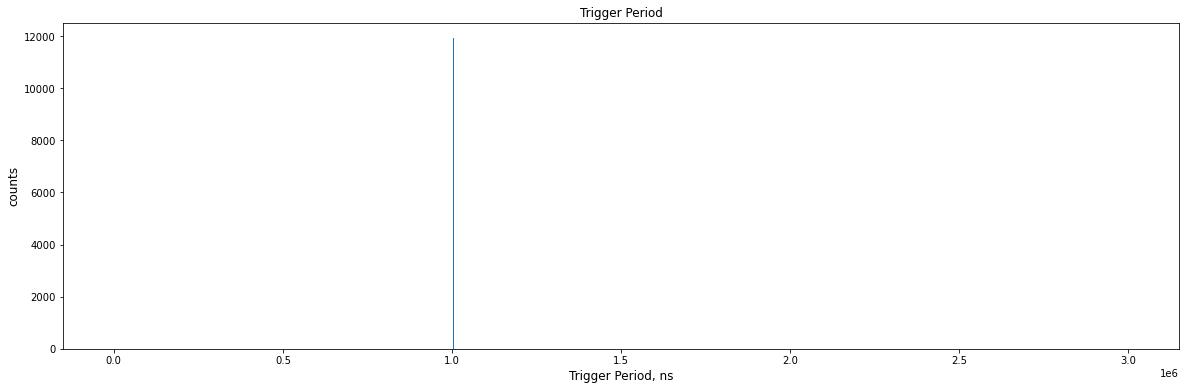

In [133]:
(n, bins, patches) = plt.hist(periodlist,range = (0,3e6), bins = 1000)
plt.title("Trigger Period", fontsize = 12) # change the title
plt.xlabel('Trigger Period, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.legend(loc='upper right')
# plt.xticks(bins[::80])
plt.show()

In [66]:
print(globals()["grid1_pulse_3.25875e9_3.2592e9_df"].shape, type(globals()["grid1_pulse_3.25875e9_3.2592e9_df"].iloc[0,0]), time.ctime())
print(globals()["grid1_pulse_3.25875e9_3.2592e9_df"].iloc[:3])

(205, 9) <class 'numpy.int64'> Mon Dec 14 12:56:34 2020
         #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  \
4541372     3228  533967509717   132   137  533968977664        900   
4541386     3228  533967509717   137   147  533968977664       2700   
4541389     3228  533967509717   137   141  533968977664       1650   

         #ToTtotal[arb]  #Trig-ToA[arb]  Unnamed: 8  
4541372             900         1467947         NaN  
4541386            2700         1467947         NaN  
4541389            1650         1467947         NaN  


In [68]:
globals()["grid1_pulse_3.25875e9_3.2592e9_df"]['#ToA'].min()/4096.*25., TrigTime[0], TrigTime[1], ((globals()["grid1_pulse_3.25875e9_3.2592e9_df"]['#ToA'].min()/4096.*25.)-TrigTime[0])

(3259087998.4375, 139145685, 303350656, 3119942313.4375)

In [69]:
((globals()["grid1_pulse_3.25875e9_3.2592e9_df"]['#ToA'].min()/4096.*25.)-TrigTime[0])*10**(-3), "us"

(3119942.3134375, 'us')

In [74]:
(533968977664-533967509717), (533968977664/4096.*25.), (533967509717/4096.*25.)

(1467947, 3259087998.4375, 3259079038.800049)

In [77]:
TrigTimeGrid1 = grid1_df['#TrigTime'].to_numpy()

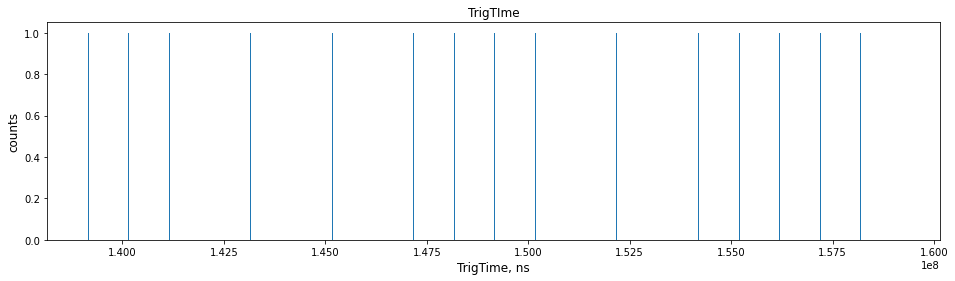

In [95]:
(n, bins, patches) = plt.hist(TrigTime/4096.*25.,range=(TrigTime.min(), TrigTime.min()+20000000), bins = 1000)
plt.title("TrigTIme", fontsize = 12) # change the title
plt.xlabel('TrigTime, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.legend(loc='upper right')
# plt.xticks(bins[::80])
plt.show()

In [110]:
len(TrigTime)

11930

'Mon Dec 14 13:44:21 2020'

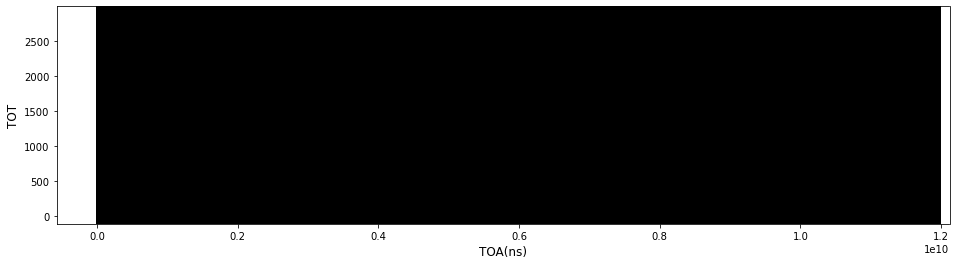

In [111]:
plt.rcParams["figure.figsize"] = (16,4)
plt.plot(grid1_df['#ToA']/4096.*25.,grid1_df['#ToT[arb]'], '.')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(len(TrigTime)):
    plt.axvline(x=(TrigTime[i]/4096.*25), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(3.25e9, 3.6e9)
# plt.xlim(TrigTime.min(), ((TrigTime.min())+100000))
# plt.savefig('TOTvsTOA_3.25e9_3.5e9_8212020_025447-1.png', bbox_inches='tight', facecolor='w')
time.ctime()
# print("Period of Oscillation:", ((globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.)-(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.)), "(ns)")oth_df = min_max(data1, 0, 76, 180, 256)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

'Mon Dec 14 13:26:00 2020'

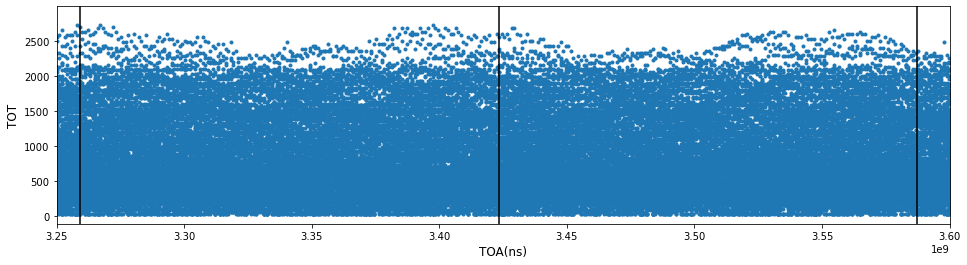

In [81]:
plt.rcParams["figure.figsize"] = (16,4)
plt.plot(grid1_df['#ToA']/4096.*25.,grid1_df['#ToT[arb]'], '.')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(100):
    plt.axvline(x=(TrigTime[i]), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
plt.xlim(3.25e9, 3.6e9)
# plt.xlim(grid1_df['#ToA'].min()/4096.*25., grid1_df['#ToA'].max()/4096.*25.)
# plt.savefig('TOTvsTOA_3.25e9_3.5e9_8212020_025447-1.png', bbox_inches='tight', facecolor='w')
time.ctime()
# print("Period of Oscillation:", ((globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.)-(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.)), "(ns)")oth_df = min_max(data1, 0, 76, 180, 256)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

'Mon Dec 14 11:47:25 2020'

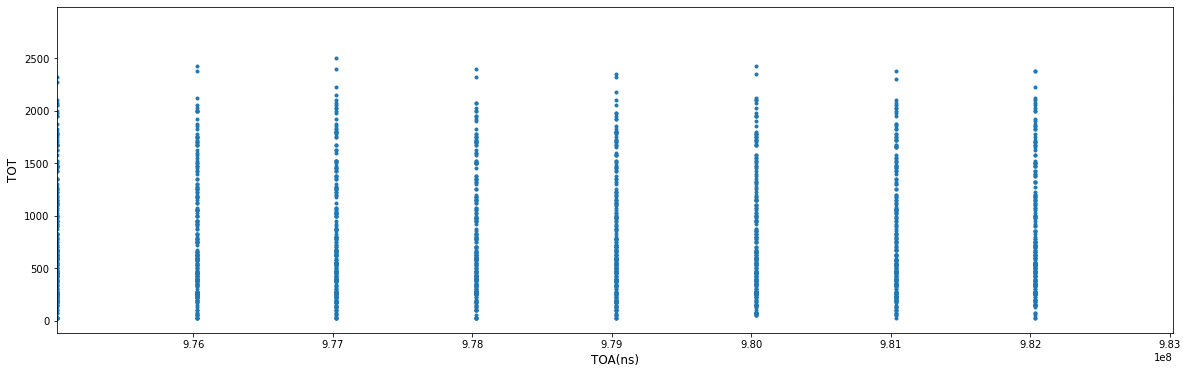

In [32]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(grid1_df['#ToA']/4096.*25.,grid1_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(20):
    plt.axvline(x=(TrigTime[i]), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
plt.xlim(grid1_df['#ToA'].min()/4096.*25., (grid1_df['#ToA'].min()/4096.*25.)+8000000)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

'Mon Dec 14 11:47:33 2020'

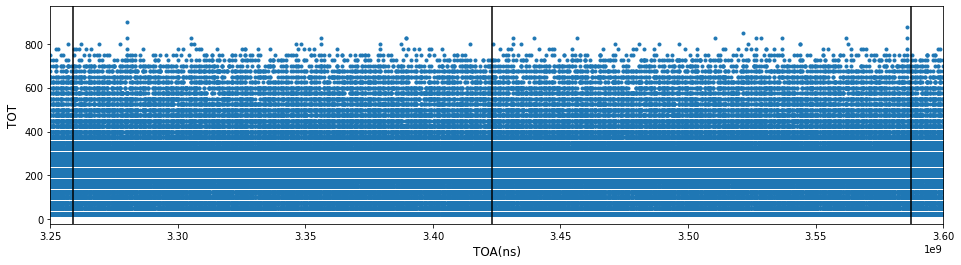

In [33]:
plt.rcParams["figure.figsize"] = (16,4)
plt.plot(oth_df['#ToA']/4096.*25.,oth_df['#ToT[arb]'], '.')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(100):
    plt.axvline(x=(TrigTime[i]), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
plt.xlim(3.25e9, 3.6e9)
# plt.savefig('TOTvsTOA_3.25e9_3.5e9_8212020_025447-1.png', bbox_inches='tight', facecolor='w')
time.ctime()
# print("Period of Oscillation:", ((globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.)-(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.)), "(ns)")oth_df = min_max(data1, 0, 76, 180, 256)
# Pt1_ToT_df = oth_df.drop(oth_df[(oth_df['#ToT[arb]'] > tMin2) & (oth_df['#ToT[arb]'] < tMax2)].index)

'Mon Dec 14 11:47:48 2020'

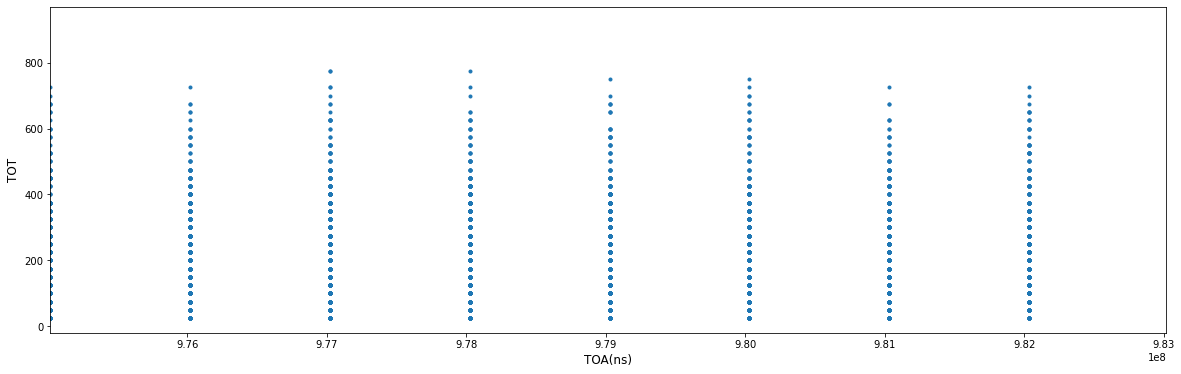

In [34]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(oth_df['#ToA']/4096.*25.,oth_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(20):
    plt.axvline(x=(TrigTime[i]), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
plt.xlim(oth_df['#ToA'].min()/4096.*25., (oth_df['#ToA'].min()/4096.*25.)+8000000)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

'Mon Dec 14 15:04:34 2020'

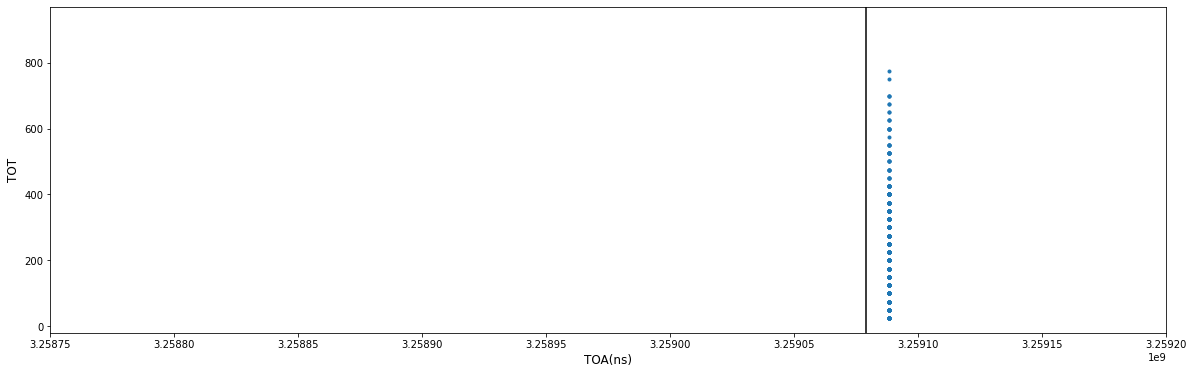

In [136]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(oth_df['#ToA']/4096.*25.,oth_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(10000):
    plt.axvline(x=(TrigTime[i]/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
plt.xlim(3.25875e9, 3.2592e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [138]:
ToAmin = (3.25875e9)*4096./25.
ToAmax = (3.2592e9)*4096./25.
globals()["oth_pulse_3.25875e9_3.25920e9_df"] = \
oth_df.drop(oth_df[(oth_df['#ToA'] < ToAmin) | (oth_df['#ToA'] > ToAmax)].index)

In [139]:
(globals()["oth_pulse_3.25875e9_3.25920e9_df"]['#ToA'].min()/4096.*25.)-(3259079038.800049)

8953.387451171875

'Mon Dec 14 11:47:52 2020'

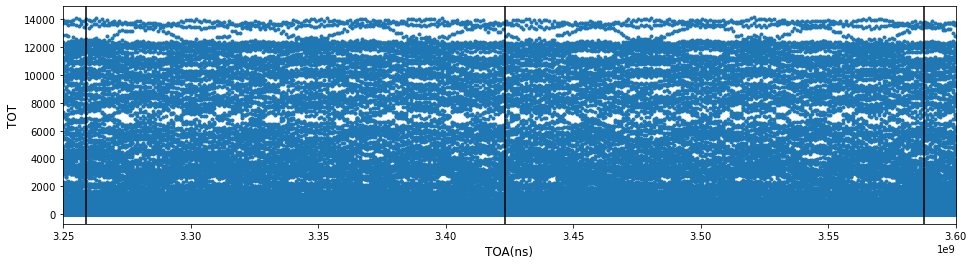

In [35]:
plt.rcParams["figure.figsize"] = (16,4)
plt.plot(Y_df['#ToA']/4096.*25.,Y_df['#ToT[arb]'], '.')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(100):
    plt.axvline(x=(TrigTime[i]), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
plt.xlim(3.25e9, 3.6e9)
# plt.savefig('TOTvsTOA_3.25e9_3.5e9_8212020_025447-1.png', bbox_inches='tight', facecolor='w')
time.ctime()
# print("Period of Oscillation:", ((globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.)-(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.)), "(ns)")oth_df = min_max(data1, 0, 76, 180, 256)
# Pt1_ToT_df = Y_df.drop(Y_df[(Y_df['#ToT[arb]'] > tMin2) & (Y_df['#ToT[arb]'] < tMax2)].index)

'Mon Dec 14 11:47:57 2020'

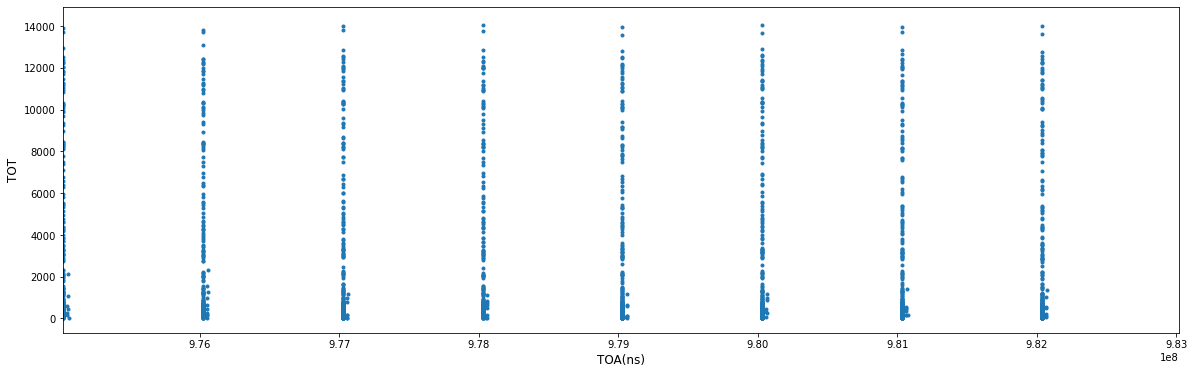

In [36]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(Y_df['#ToA']/4096.*25.,Y_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(20):
    plt.axvline(x=(TrigTime[i]), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
plt.xlim(Y_df['#ToA'].min()/4096.*25., (Y_df['#ToA'].min()/4096.*25.)+8000000)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

'Mon Dec 14 11:48:02 2020'

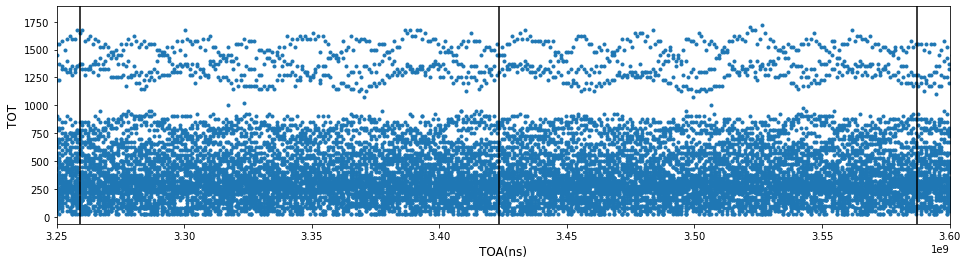

In [37]:
plt.rcParams["figure.figsize"] = (16,4)
plt.plot(X_df['#ToA']/4096.*25.,X_df['#ToT[arb]'], '.')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(100):
    plt.axvline(x=(TrigTime[i]), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
plt.xlim(3.25e9, 3.6e9)
# plt.savefig('TOTvsTOA_3.25e9_3.5e9_8212020_025447-1.png', bbox_inches='tight', facecolor='w')
time.ctime()
# print("Period of Oscillation:", ((globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.)-(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.)), "(ns)")oth_df = min_max(data1, 0, 76, 180, 256)
# Pt1_ToT_df = X_df.drop(X_df[(X_df['#ToT[arb]'] > tMin2) & (X_df['#ToT[arb]'] < tMax2)].index)

'Mon Dec 14 11:48:11 2020'

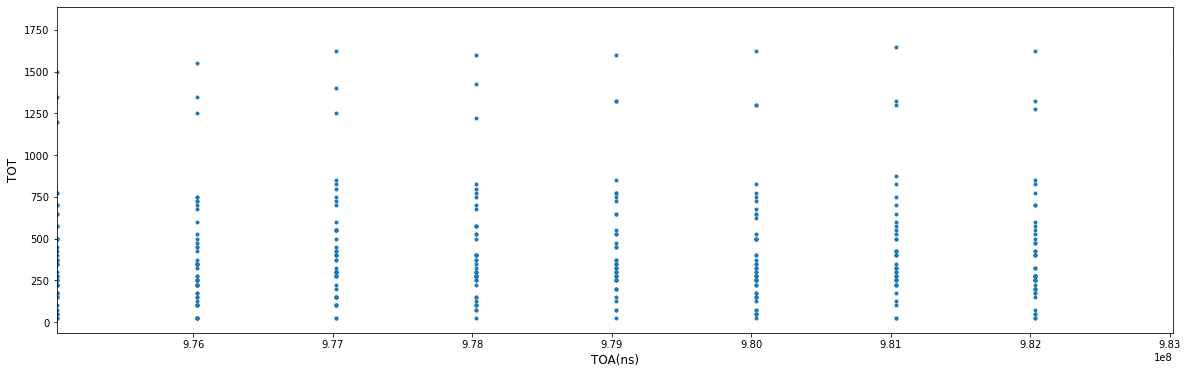

In [38]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(X_df['#ToA']/4096.*25.,X_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(20):
    plt.axvline(x=(TrigTime[i]), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
plt.xlim(X_df['#ToA'].min()/4096.*25., (X_df['#ToA'].min()/4096.*25.)+8000000)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()